In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [44]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [45]:
#separating dataframe into dataframe for different countries for easier processing
ita = df[df['Country'] == 'Italy']
ita=ita.reset_index()
ita.index +=1

ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1

tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1

sk = df[df['Country'] == 'Republic of Korea']
sk=sk.reset_index()
sk.index +=1

In [ ]:
#After considering 50 cumulative cases as start of epidemic, we have found the following start dates for each country
#The index numbers represent Day number from start of original data

In [46]:
ita_start =ita[ita['Date_reported']=='2020-02-23']
ita_start
ger_start =ger[ger['Date_reported']=='2020-02-29']
ger_start
tur_start =tur[tur['Date_reported']=='2020-03-18']
tur_start

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
76,136762,2020-03-18,TR,Turkey,EURO,51,98,1,1


In [47]:
ita_new = ita[51:625]
ger_new = ger[57:620]
tur_new = tur[75:626]
ita_new = ita_new.reset_index()
ita_new.index +=1
ita_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,52,64633,2020-02-23,IT,Italy,EURO,62,79,2,2
2,53,64634,2020-02-24,IT,Italy,EURO,53,132,0,2
3,54,64635,2020-02-25,IT,Italy,EURO,97,229,4,6
4,55,64636,2020-02-26,IT,Italy,EURO,93,322,5,11
5,56,64637,2020-02-27,IT,Italy,EURO,78,400,1,12
...,...,...,...,...,...,...,...,...,...,...
570,621,65202,2021-09-14,IT,Italy,EURO,2792,4609205,36,129955
571,622,65203,2021-09-15,IT,Italy,EURO,4009,4613214,72,130027
572,623,65204,2021-09-16,IT,Italy,EURO,4826,4618040,73,130100
573,624,65205,2021-09-17,IT,Italy,EURO,5115,4623155,67,130167


In [48]:
ger_new = ger_new.reset_index()
ger_new.index +=1
ger_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,58,48964,2020-02-29,DE,Germany,EURO,10,57,0,0
2,59,48965,2020-03-01,DE,Germany,EURO,54,111,0,0
3,60,48966,2020-03-02,DE,Germany,EURO,18,129,0,0
4,61,48967,2020-03-03,DE,Germany,EURO,28,157,0,0
5,62,48968,2020-03-04,DE,Germany,EURO,39,196,0,0
...,...,...,...,...,...,...,...,...,...,...
559,616,49522,2021-09-09,DE,Germany,EURO,15431,4046112,50,92498
560,617,49523,2021-09-10,DE,Germany,EURO,12969,4059081,55,92553
561,618,49524,2021-09-11,DE,Germany,EURO,11214,4070295,45,92598
562,619,49525,2021-09-12,DE,Germany,EURO,7345,4077640,8,92606


In [49]:
tur_new = tur_new.reset_index()
tur_new.index +=1
tur_new

,level_0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,76,136762,2020-03-18,TR,Turkey,EURO,51,98,1,1
2,77,136763,2020-03-19,TR,Turkey,EURO,93,191,1,2
3,78,136764,2020-03-20,TR,Turkey,EURO,168,359,2,4
4,79,136765,2020-03-21,TR,Turkey,EURO,311,670,5,9
5,80,136766,2020-03-22,TR,Turkey,EURO,277,947,12,21
...,...,...,...,...,...,...,...,...,...,...
547,622,137308,2021-09-15,TR,Turkey,EURO,27802,6710666,276,60393
548,623,137309,2021-09-16,TR,Turkey,EURO,28224,6738890,248,60641
549,624,137310,2021-09-17,TR,Turkey,EURO,28118,6767008,262,60903
550,625,137311,2021-09-18,TR,Turkey,EURO,27692,6794700,237,61140


# Country Populations:

## Italy: 59.55 million (2020) Germany: 83.24 million (2020) Turkey: 84.34 million (2020)

In [50]:
ita_pop = 59550000
ger_pop = 83240000
tur_pop = 84340000

In [51]:
#normalising data for each country
ita_norm_case = ita_new['Cumulative_cases']/ita_pop
ger_norm_case = ger_new['Cumulative_cases']/ger_pop
tur_norm_case = tur_new['Cumulative_cases']/tur_pop

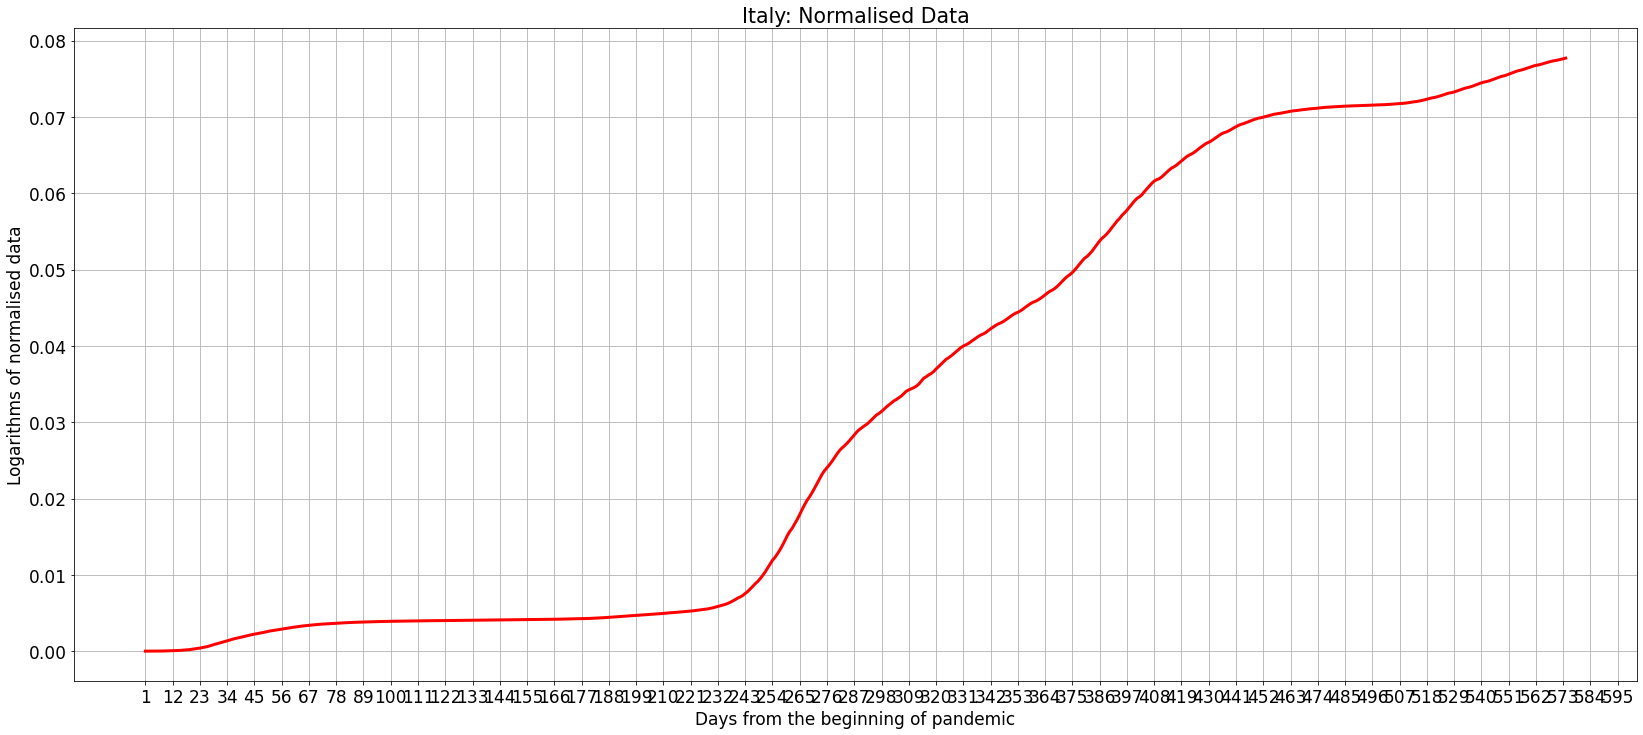

In [52]:
x1 = ita_new.index
y1 = ita_norm_case

plt.plot(x1,y1,color="red",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
#plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Italy: Normalised Data')
plt.rcParams['figure.figsize'] = [32,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()


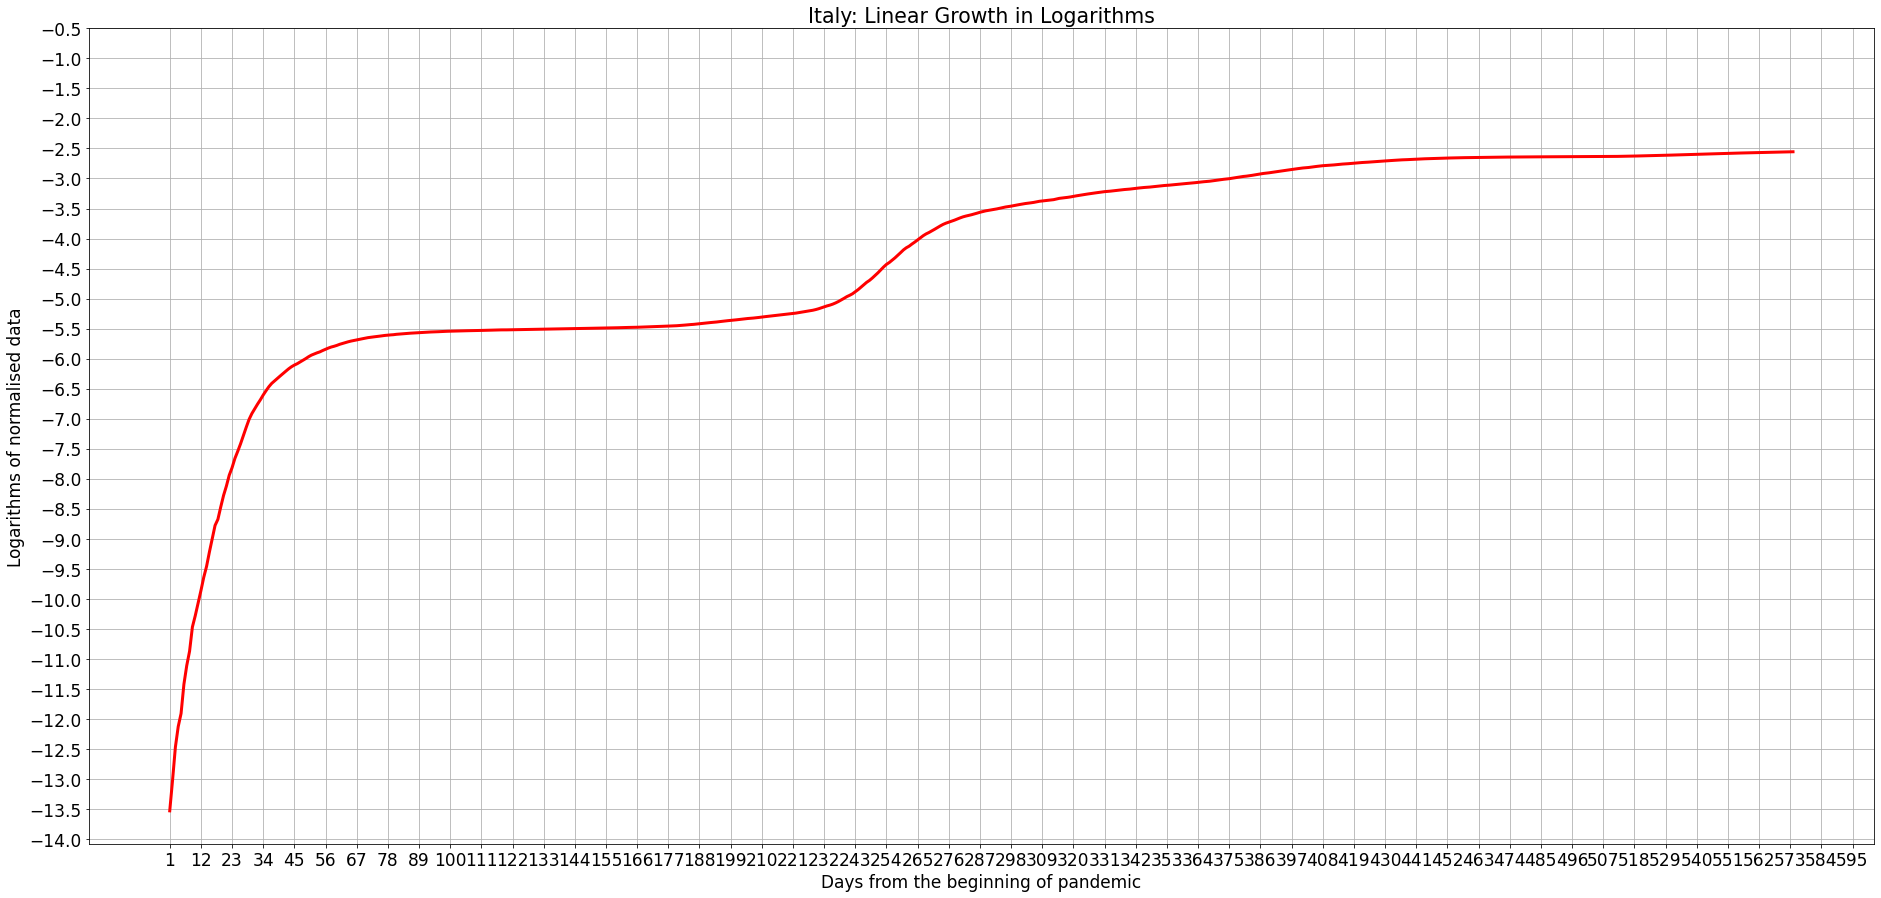

In [53]:
x1 = ita_new.index
y1 = np.log(ita_norm_case)

plt.plot(x1,y1,color="red",linewidth =3.0)
plt.xticks(np.arange(1,600,11))
plt.yticks(np.arange(-14,0,0.5))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Logarithms of normalised data')
plt.title('Italy: Linear Growth in Logarithms')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()


Start day for Italy : 52
Days - 10 : 42


### Interval 1 : 1-34
### Interval 2 : 35 - 235
### Interval 3 : 1-235
### Interval 4: 1-574

In [54]:

x = ita_new.index.values
y= np.log(ita_norm_case)
x_int1 = x[:34]
y_int1 = y[:34]
x_int2 = x[34:235]
y_int2 = y[34:235]
x_int3 = x[:235]
y_int3 = y[:235]
x_int4 = x[:574]
y_int4 = y[:574]

curve1 = np.polyfit(x_int1,y_int1,1)
r1= curve1[0]
c1= curve1[1]
print(r1,c1)

curve2 = np.polyfit(x_int2,y_int2,1)
r2= curve2[0]
c2= curve2[1]
print(r2,c2)

curve3 = np.polyfit(x_int3,y_int3,1)
r3= curve3[0]
c3= curve3[1]
print(r3,c3)

curve4 = np.polyfit(x_int4,y_int4,1)
r4= curve4[0]
c4= curve4[1]
print(r4,c4)

0.1970057044682587 -12.57845966574984
0.0037340501732819643 -6.049790635801064
0.014260261548827638 -7.747109589659059
0.00963509192760245 -7.0626126056141585


In [55]:
y1 = r1*x_int1 +c1
y2 = r2*x_int2 +c2
y3 = r3*x_int3 +c3
y4 = r4*x_int4 +c4

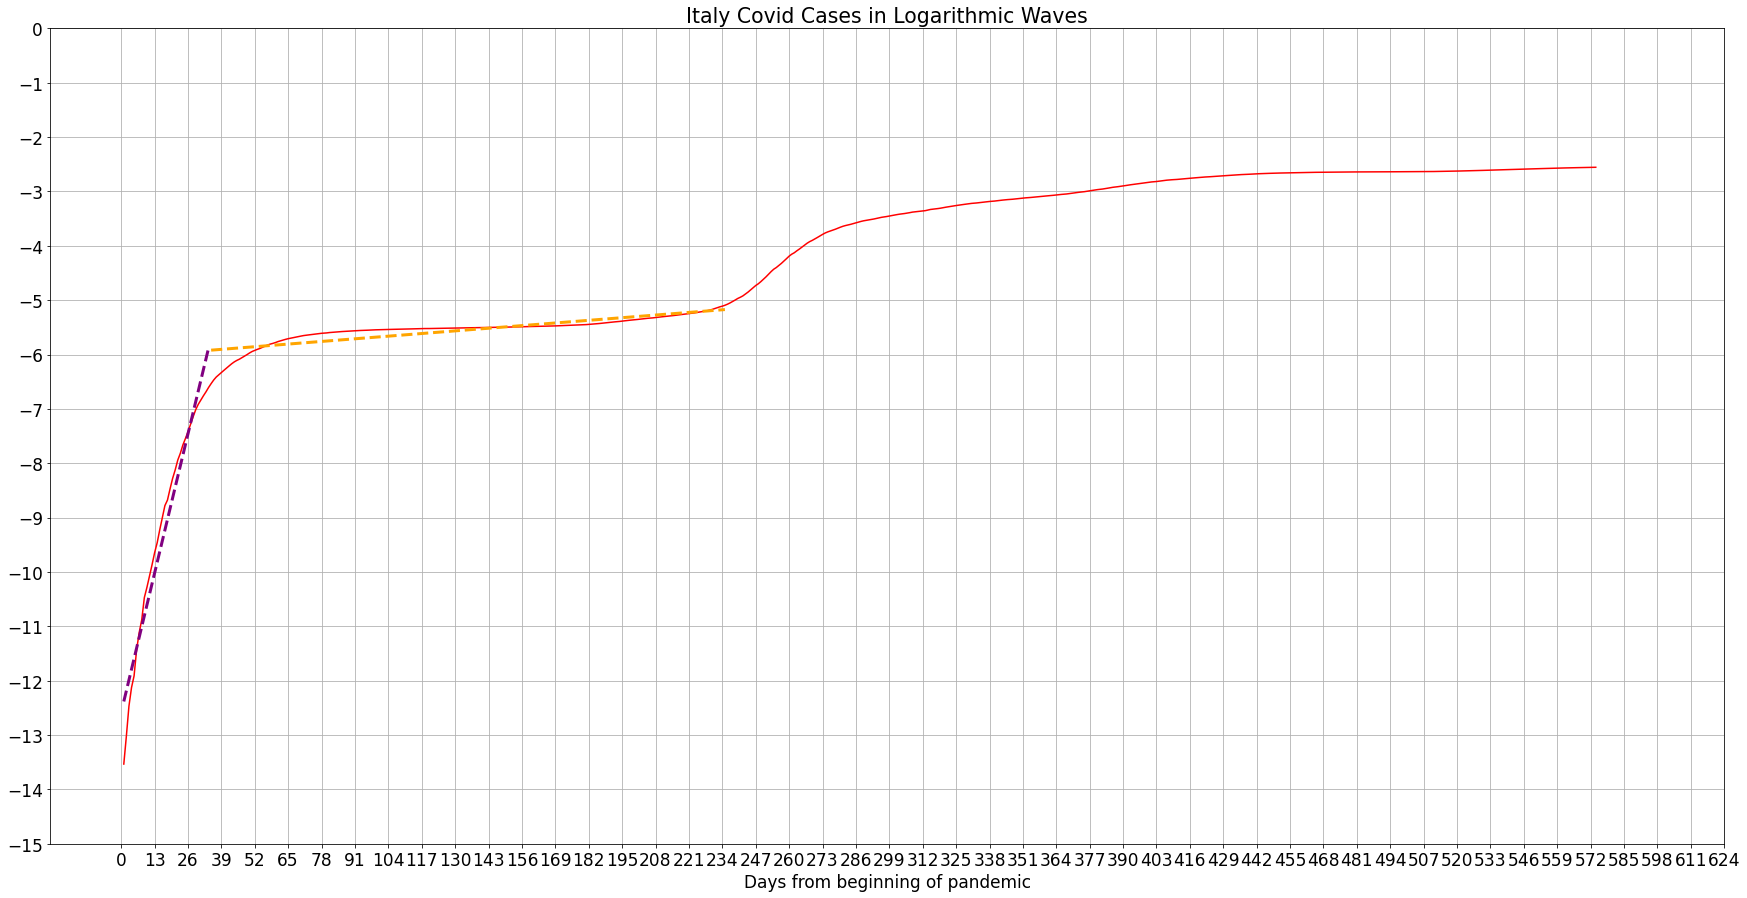

In [56]:
plt.plot(x,y,color="red")
plt.plot(x_int1,y1,color="purple",linestyle="dashed",linewidth=3.0)
plt.plot(x_int2,y2,color="orange",linestyle="dashed",linewidth=3.0)
#plt.plot(x_int3,y3,color="red",linestyle="dashed",linewidth=3.0)
#plt.plot(x_int4,y4,color="green",linestyle="dashed",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,625,13))
plt.yticks(np.arange(-15,1,1))
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.xlabel('Days from beginning of pandemic')
plt.rcParams['figure.figsize'] = [30,15]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [57]:
waveEnd = 234
b=0.1
a1= r1+b
print(a1)

0.2970057044682587


In [58]:
print(x_int1)
print(r1)
print(c1)

print(r1*x[33]+c1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]
0.1970057044682587
-12.57845966574984
-5.8802657138290435


In [59]:
from scipy.special import expit
obv_y = ita_norm_case[:34]
#linreg_y = [0] *34

linreg1 = c1 + r1 * x_int1
expit(linreg1)
exp_y = np.exp(linreg1)
print(exp_y)

[4.19568492e-06 5.10929945e-06 6.22185445e-06 7.57666940e-06
 9.22649664e-06 1.12355754e-05 1.36821330e-05 1.66614310e-05
 2.02894741e-05 2.47075271e-05 3.00876155e-05 3.66392235e-05
 4.46174505e-05 5.43329445e-05 6.61639967e-05 8.05712724e-05
 9.81157465e-05 1.19480547e-04 1.45497554e-04 1.77179790e-04
 2.15760865e-04 2.62743006e-04 3.19955555e-04 3.89626193e-04
 4.74467681e-04 5.77783487e-04 7.03596412e-04 8.56805225e-04
 1.04337541e-03 1.27057143e-03 1.54723962e-03 1.88415257e-03
 2.29442866e-03 2.79404276e-03]


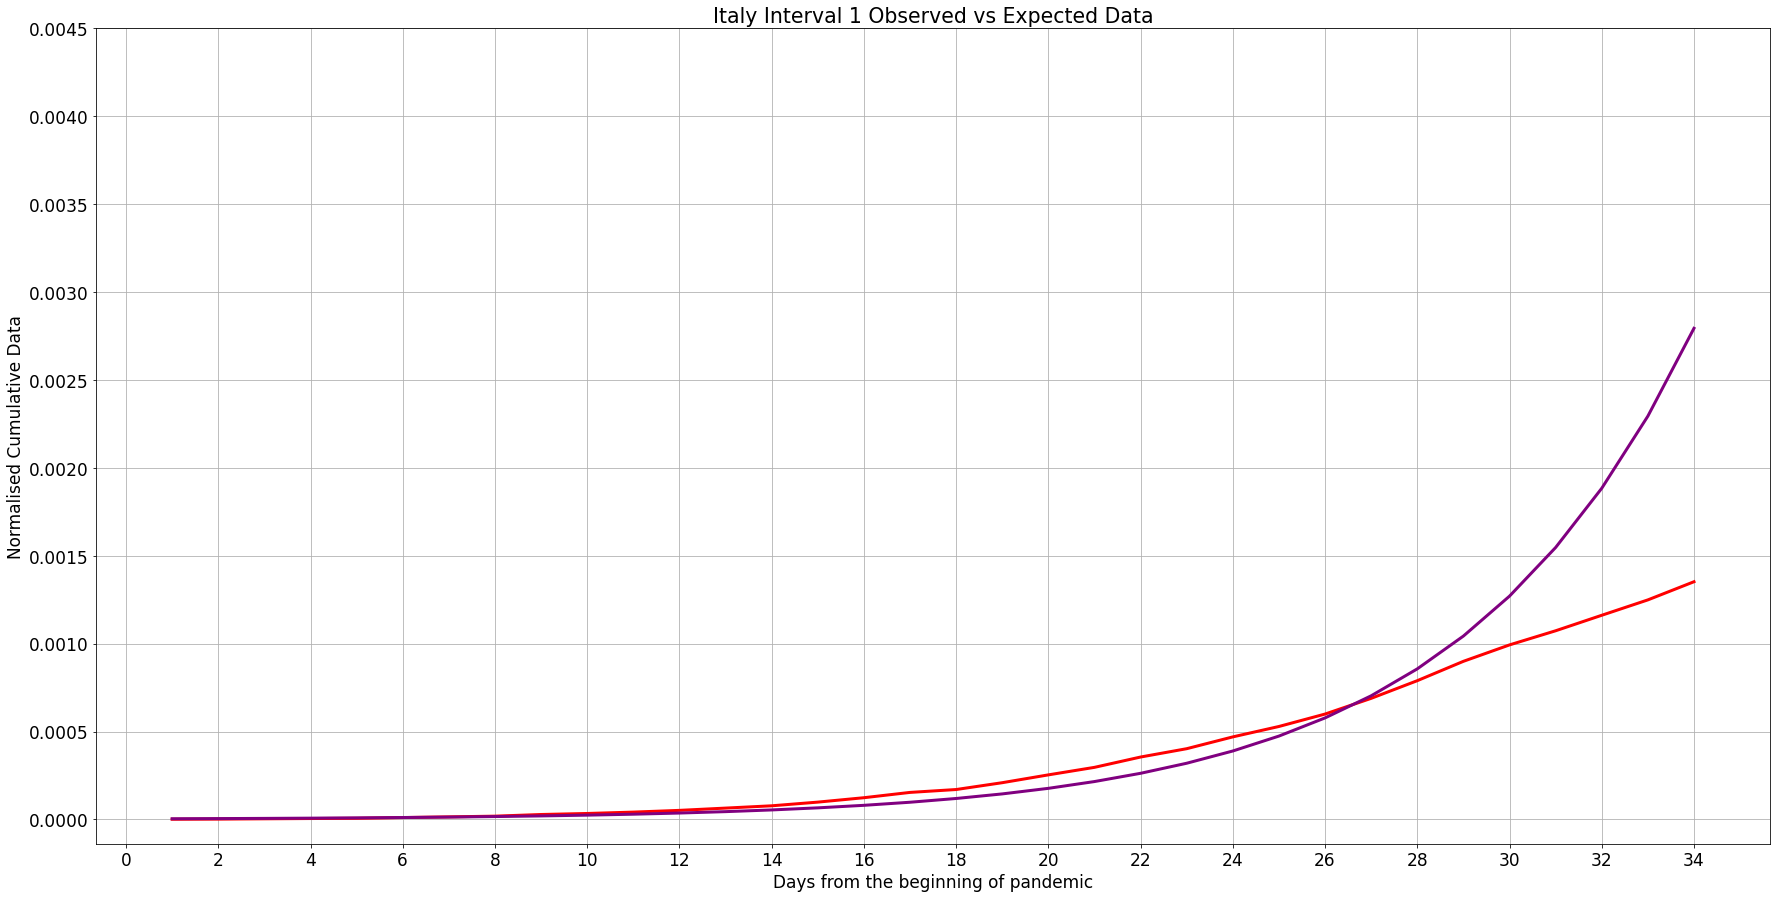

In [60]:
plt.plot(x_int1,obv_y,color="red",linewidth=3.0)
plt.plot(x_int1,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
plt.xticks(np.arange(0,35,2))
plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 1 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Normalised Cumulative Data')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [61]:
day_10_ita = ita['Cumulative_cases'][42]
R0 = day_10_ita / ita_pop
print(R0)
I0 = ita_new['Cumulative_cases'][1]/tur_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

5.0377833753148615e-08
8.863070132945156e-07
0.9999990633151529


In [62]:
print(x_int1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34]


In [63]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a1 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ita_norm_case[:34]

In [64]:
from scipy.integrate import solve_ivp
sol = solve_ivp(equations, [1, inp.shape[0]], [S0, R0], t_eval=x_int1)

In [65]:
p = 1 - sol.y[0, :]

MSE = np.mean(np.square(p - inp))

print(a1,MSE)
print(p)
print(inp.values)

0.2970057044682587 1.2667570690661436e-07
[9.36684847e-07 1.22769754e-06 1.58231927e-06 2.01338246e-06
 2.53768754e-06 3.17654538e-06 3.95577726e-06 4.90571491e-06
 6.20531916e-06 9.10017318e-06 1.32944838e-05 1.81788323e-05
 2.32731720e-05 2.82268287e-05 3.28185005e-05 3.69562577e-05
 4.06775429e-05 4.41491710e-05 4.76673292e-05 5.16575770e-05
 5.66748462e-05 6.34034409e-05 7.26570373e-05 8.53786841e-05
 1.02640802e-04 1.25645185e-04 1.55722998e-04 1.94334779e-04
 2.43070437e-04 3.03649256e-04 3.77919890e-04 4.67860366e-04
 5.75578083e-04 7.03309813e-04]
[1.32661629e-06 2.21662469e-06 3.84550798e-06 5.40722082e-06
 6.71704450e-06 1.09151973e-05 1.49118388e-05 1.89420655e-05
 2.83627204e-05 3.41897565e-05 4.20151134e-05 5.18723762e-05
 6.47858942e-05 7.78505458e-05 9.87909320e-05 1.23845508e-04
 1.54021830e-04 1.70428212e-04 2.09269521e-04 2.53786734e-04
 2.96557515e-04 3.55281276e-04 4.02686818e-04 4.69857263e-04
 5.29068010e-04 5.99714526e-04 6.89084803e-04 7.89605374e-04
 8.99714526

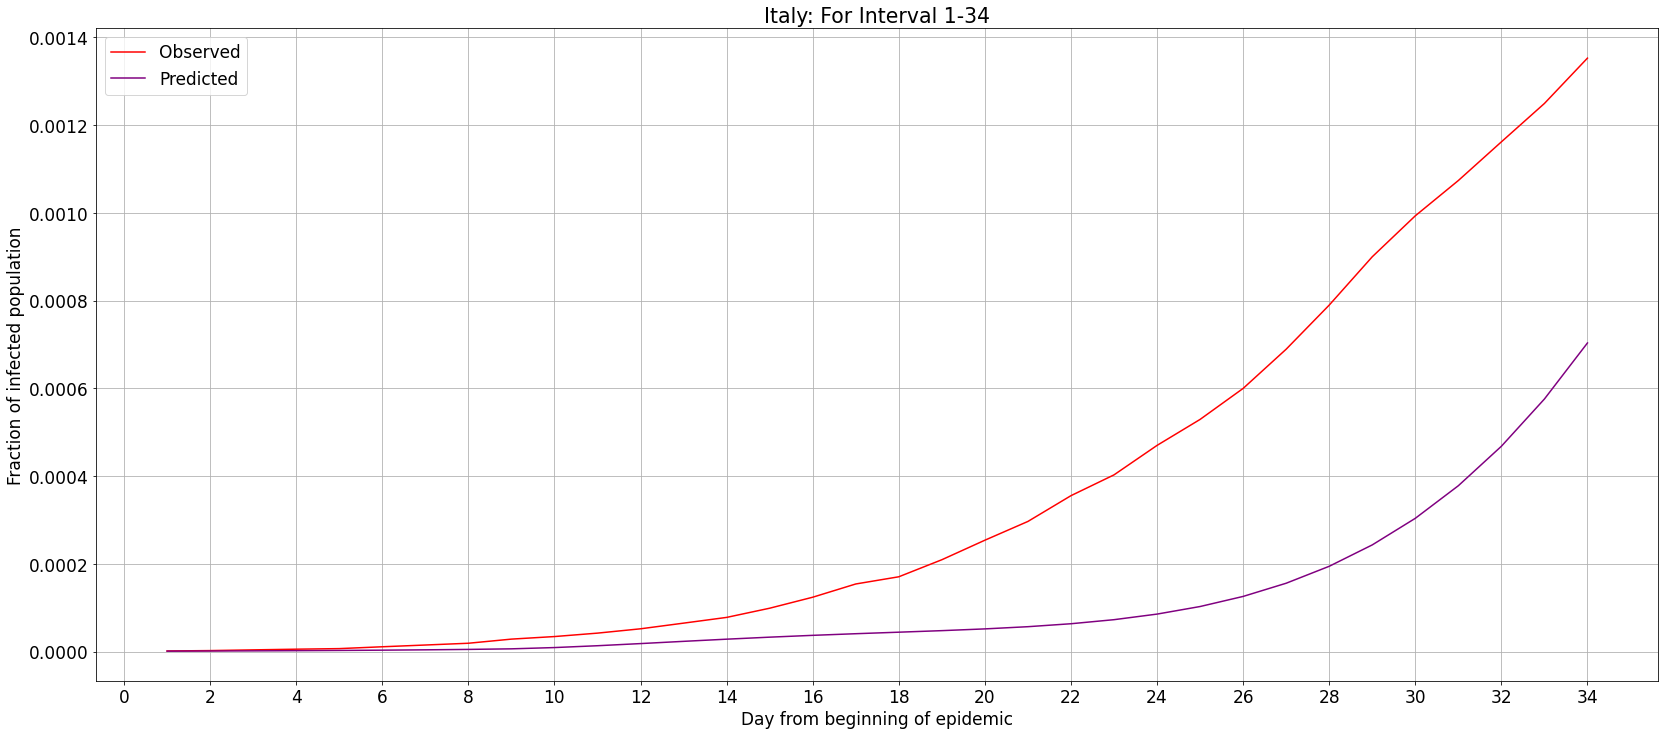

In [33]:
plt.figure()
plt.plot(x_int1,inp.values,color="red", label = 'Observed')
plt.plot(x_int1, p, color="purple",label = 'Predicted')
plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Italy: For Interval 1-34')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [34]:
#trying different I values
day_10_ita = ita['Cumulative_cases'][42]
R0 = day_10_ita / ita_pop
print(R0)
I0 = ita_new['Cumulative_cases'][1] /ita_pop - R0
print(I0)
S0 = 1- I0 - R0
print(S0)

5.0377833753148615e-08
1.2762384550797649e-06
0.9999986733837112


In [37]:
sol = solve_ivp(equations, [1, inp.shape[0]], [S0, R0], t_eval=x_int1)

In [39]:
p = 1 - sol.y[0, :]

MSE = np.mean(np.square(p - inp))

print(a1,MSE)


0.2970057044682587 6.972743437154609e-08


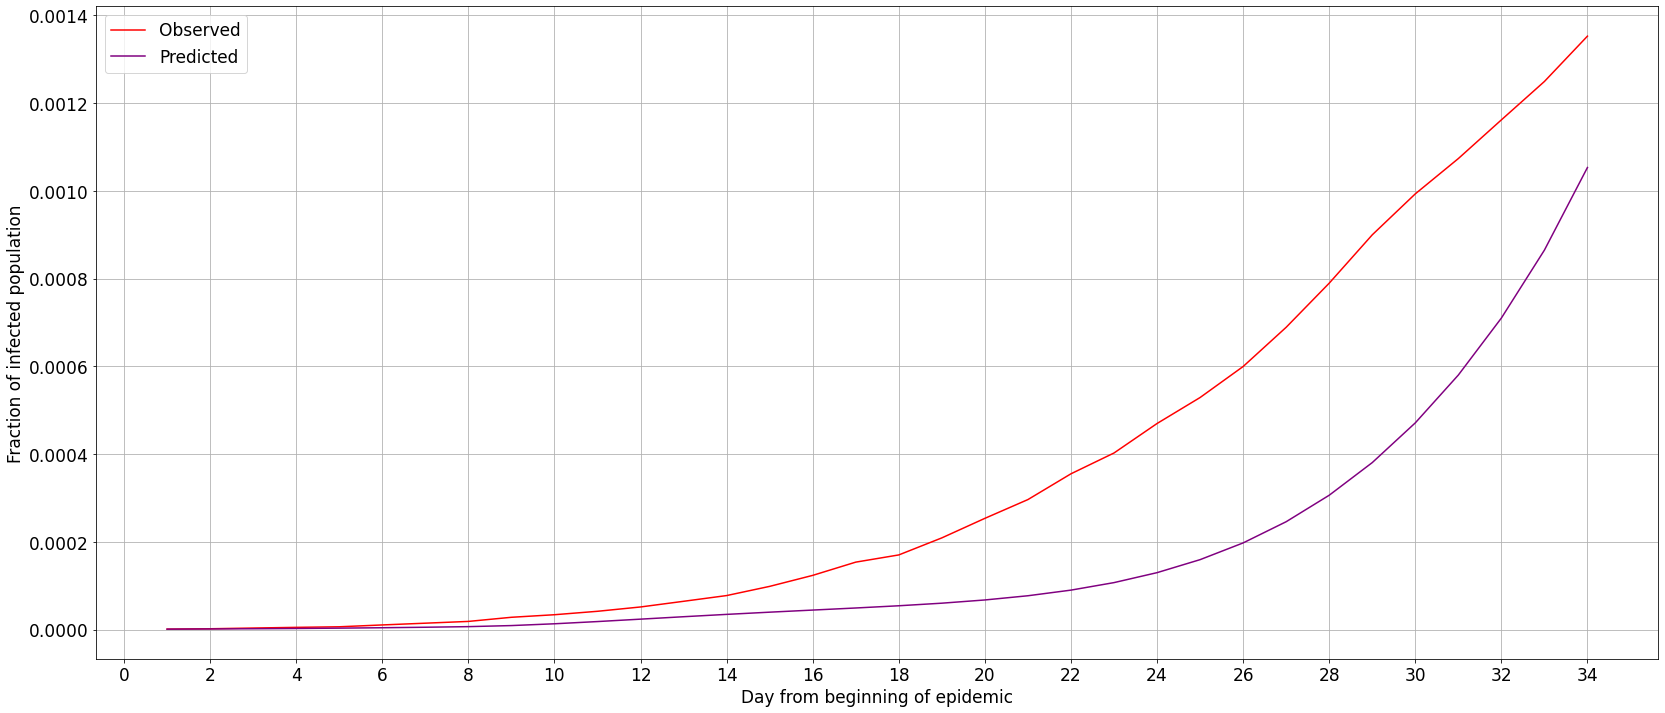

In [42]:
plt.figure()
plt.plot(x_int1, inp,color="red", label = 'Observed')
plt.plot(x_int1, p, color="purple", label = 'Predicted')
plt.xticks(np.arange(0,35,2))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.rcParams['figure.figsize'] = [28,12]
plt.legend(loc="upper left")
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [ ]:
x1 = ita_new.index.values
y1 = ita_new['Cumulative_cases']/ita_pop
x2 = ger_new.index.values
y2 = ger_new['Cumulative_cases']/ger_pop
x3 = tur_new.index.values
y3 = tur_new['Cumulative_cases']/tur_pop

plt.plot(x1,y1, color="red", label = 'Italy')
plt.plot(x2,y2, color="blue", label = 'Germany')
plt.plot(x3,y3, color="green", label = 'Turkey')
#plt.yticks(np.arange(0, 7000000, 200000))
plt.xticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Normalized Data')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,15]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [ ]:
#Interval 2
obv_y = ita_norm_case[34:235]
linreg2 = c2 + r2 * x_int2
expit(linreg2)
exp_y = np.exp(linreg2)
print(exp_y)

In [ ]:
plt.plot(x_int2,obv_y,color="red",linewidth=3.0)
plt.plot(x_int2,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [ ]:
day_10_ita = ita_new['Cumulative_cases'][25]
R1 = day_10_ita / ita_pop
print(R1)
I1 = ita_new['Cumulative_cases'][35]/ita_pop - R1
print(I1)
S1 = 1- I1 - R1
print(S1)
print(x_int2.shape)

In [ ]:
b=0.1
a2= r2+b
print(a)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a2 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ita_norm_case[34:235]
print(x_int2)

In [ ]:
sol = solve_ivp(equations, [1, inp.shape[0]], [S1, R1], t_eval= x_int2-34)


In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a,MSE)
print(p)
print(x_int2)
print(inp)

In [ ]:
plt.figure()
plt.plot(x_int2,inp.values,color="red", label = 'Observed')
plt.plot(x_int2, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(25,235,5))
plt.yticks(np.arange(0,0.03,0.002))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Italy: For Interval 35 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 3: 1 - 235

In [ ]:
obv_y = ita_norm_case[:235]
linreg3 = c3 + r3 * x_int3
expit(linreg3)
exp_y = np.exp(linreg3)


In [ ]:
plt.plot(x_int3,obv_y,color="red",linewidth=3.0)
plt.plot(x_int3,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [ ]:
day_10_ita = ita['Cumulative_cases'][42]
R3 = day_10_ita / ita_pop
print(R3)
I3 = ita_new['Cumulative_cases'][1]/tur_pop - R3
print(I3)
S3 = 1- I3 - R3
print(S3)
print(x_int2.shape)

In [ ]:
b=0.1
a3= r3+b
print(a3)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a3 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ita_norm_case[:235]

In [ ]:
sol = solve_ivp(equations, [1, inp.shape[0]], [S3, R3], t_eval= x_int3)

In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a,MSE)
print(p)


In [ ]:
plt.figure()
plt.plot(x_int3,inp.values,color="red", label = 'Observed')
plt.plot(x_int3, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(1,238,5))
plt.yticks(np.arange(0,0.007,0.0005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Italy: For Interval 1 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

### Interval 4: 1 - 574

In [ ]:
obv_y = ita_norm_case[:574]
linreg4 = c4 + r4 * x_int4
expit(linreg4)
exp_y = np.exp(linreg4)

In [ ]:
plt.plot(x_int4,obv_y,color="red",linewidth=3.0)
plt.plot(x_int4,exp_y,color="purple",linewidth=3.0)

#plt.xaxis.set_ticks(np.arange(0,625,13))
#plt.yaxis.set_ticks
#plt.xticks(np.arange(0,35,2))
#plt.yticks(np.arange(0,0.005,0.0005))
plt.title('Italy Interval 2 Observed vs Expected Data')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [28,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()

In [ ]:
day_10 = ita['Cumulative_cases'][42]
R4 = day_10 / ita_pop
print(R4)
I4 = ita_new['Cumulative_cases'][1]/tur_pop - R4
print(I4)
S4 = 1- I4 - R4
print(S4)

In [ ]:
b=0.1
a4= r4+b
print(a4)

In [ ]:
def equations(t, y):
    # Y[0] = S(t)
    # Y[1] = R(t)
    i = 1 -y[0]-y[1]
    
    dSdt = -a4 * y[0] * i
    dRdt = b * i
    
    return [dSdt, dRdt]
inp = ita_norm_case[:574]

In [ ]:
sol = solve_ivp(equations, [1, inp.shape[0]], [S4, R4], t_eval= x_int4)

In [ ]:
p = 1 - sol.y[0, :]
MSE = np.mean(np.square(p - inp))

print(a,MSE)

In [ ]:
plt.figure()
plt.plot(x_int4,inp.values,color="red", label = 'Observed')
plt.plot(x_int4, p , color="purple",label = 'Predicted')
plt.xticks(np.arange(0,600,15))
plt.yticks(np.arange(0,0.09,0.005))
plt.xlabel('Day from beginning of epidemic')
plt.ylabel('Fraction of infected population')
plt.title('Italy: For Interval 1 - 235')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [30,12]
plt.rcParams.update({'font.size': 17})
plt.grid()
plt.show()